# Assignment 4: Descriptive Tables
## Author: Jerry Hong

In [2]:
# Find working directory
import os
path = os.getcwd()
print(path)

C:\Users\jerry\OneDrive - Emory University\AtlantaJunior\Fall 2022\ECON 220\Lab\Homework


In [1]:
# Import packages here: numpy, pandas, and seaborn
import numpy as np
import pandas as pd
import seaborn as sns

## Import Data Set
- Import the data set on women labor force participation from Canvas: Files $\to$ Data $\to$ mroz.csv
- The description of the variables can be found [here](http://fmwww.bc.edu/ec-p/data/wooldridge/mroz.des)

In [8]:
# Import data
labor = pd.read_csv(r"C:\Users\jerry\OneDrive - Emory University\AtlantaJunior\Fall 2022\ECON 220\Lab\Data\mroz.csv")


# Check the information of the data set

labor.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   inlf      753 non-null    int64  
 1   hours     753 non-null    int64  
 2   kidslt6   753 non-null    int64  
 3   kidsge6   753 non-null    int64  
 4   age       753 non-null    int64  
 5   educ      753 non-null    int64  
 6   wage      428 non-null    float64
 7   repwage   753 non-null    float64
 8   hushrs    753 non-null    int64  
 9   husage    753 non-null    int64  
 10  huseduc   753 non-null    int64  
 11  huswage   753 non-null    float64
 12  faminc    753 non-null    int64  
 13  mtr       753 non-null    float64
 14  motheduc  753 non-null    int64  
 15  fatheduc  753 non-null    int64  
 16  unem      753 non-null    float64
 17  city      753 non-null    int64  
 18  exper     753 non-null    int64  
 19  nwifeinc  753 non-null    float64
 20  lwage     428 non-null    float6

## Crosstabs and Pivot Tables
- Create a crosstab to show the frequency of women by labor force participation and whether someone lives in the city
- Create another crosstab to show the relative frequency of women by labor force participation and whether someone lives in the city
- Create a pivot table to summarize the mean of education by labor force participation and whether someone lives in the city. Round to 2 decimal places
- Create another pivot table to summarize the mean of education by labor force participation and THEN whether someone lives in the city. Round to 2 decimal places

In [9]:
# Use value_counts() to inspect the values that the variable "city" can take
labor['city'].value_counts()

1    484
0    269
Name: city, dtype: int64

In [10]:
# Inspect the values that the variable "inlf" (in labor force) can take
labor['inlf'].value_counts()

1    428
0    325
Name: inlf, dtype: int64

In [11]:
# Convert "city" and "inlf" into categorical variables to rename them later
labor['city'] = labor['city'].astype('category')
labor['inlf'] = labor['inlf'].astype('category')

In [12]:
# Rename the categories within "city" and "inlf": HINT
labor['city'] = labor['city'].cat.rename_categories({0: "not city", 1: "city"})
labor['inlf'] = labor['inlf'].cat.rename_categories({0: "not in LF", 1: "in LF"})

In [44]:
# Create a table to show the frequency of women by labor force participation and whether someone lives in the city
pd.crosstab(labor.inlf, labor.city, margins=True)

city,not city,city,All
inlf,,,
not in LF,115,210,325
in LF,154,274,428
All,269,484,753


In [45]:
# Create a table to show the relative frequency (proportion) of women by labor force participation and whether someone 
# lives in the city
pd.crosstab(labor.inlf, labor.city, margins=True, normalize=True)

city,not city,city,All
inlf,,,
not in LF,0.152722,0.278884,0.431607
in LF,0.204515,0.363878,0.568393
All,0.357238,0.642762,1.000000


In [37]:
# Create a pivot table to summarize the mean of education by labor force participation and whether someone lives in the city
# Round to 2 decimal places
pivot1 = labor.pivot_table(values=['educ'],
                          index='inlf',
                          columns='city',
                          aggfunc='mean').round(2)
pivot1

educ       
city      not city   city
inlf                     
not in LF    11.30  12.07
in LF        12.18  12.93

In [39]:
# Create a pivot table to summarize the mean of education by labor force participation and THEN whether someone lives in the city
# Round to 2 decimal places
pivot2 = labor.pivot_table(values=['educ'],
                          index=['inlf','city'],
                          aggfunc='mean').round(2)
pivot2


educ
inlf      city           
not in LF not city  11.30
          city      12.07
in LF     not city  12.18
          city      12.93

## Table Visualization
- Create a heat map to visualize the 1st pivot table you created above to summarize education. Change title, x label, y label, x tick label, and y tick label.
- Create another heat map to visualize the 2nd pivot table you created above to summarize education. You do not need to change the labels of this plot. Just observe this plot and see that it is not as effective to visualize the data and add the labels compared to the first one.

[Text(0.5, 1.0, 'Mean Education by Labor Partication and City Residence'),
 Text(0.5, 15.0, 'City'),
 [Text(0.5, 0, 'Not in City'), Text(1.5, 0, 'In City')],
 Text(33.0, 0.5, 'LF Participation'),
 [Text(0, 0.5, 'Not in LF'), Text(0, 1.5, 'In LF')]]

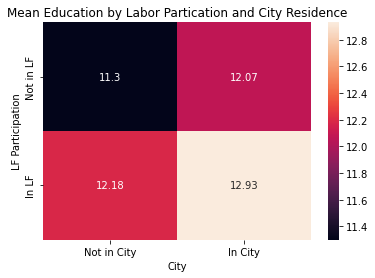

In [43]:
# 1st heat map
heatmap1 = sns.heatmap(pivot1, annot=True, fmt='g')
heatmap1.set(title='Mean Education by Labor Partication and City Residence',
            xlabel='City',
            xticklabels=['Not in City','In City'],
            ylabel='LF Participation',
            yticklabels=['Not in LF', 'In LF'])

[Text(0.5, 1.0, 'Mean Education by Labor Partication and City Residence')]

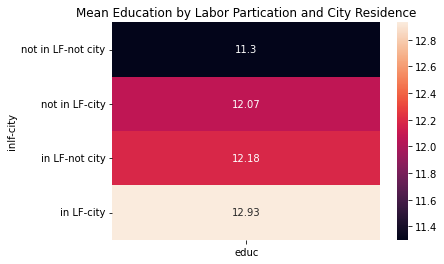

In [42]:
# 2nd heat map
heatmap2 = sns.heatmap(pivot2, annot=True, fmt='g')
heatmap2.set(title='Mean Education by Labor Partication and City Residence')

In [46]:
!jupyter nbconvert --to html Assignment_4.ipynb

[NbConvertApp] Converting notebook Assignment_4.ipynb to html
[NbConvertApp] Writing 635181 bytes to Assignment_4.html
